## Problem 1: Max Subarray Problem

Recall the max subarray problem presented in class. We used divide and conquer method to derive a $\Theta(n \log(n))$ worst case time algorithm to solve it.

In this assignment, we would like you to solve this problem in $\Theta(n)$ time. I.e, your algorithm should be able to compute the result by just iterating through the array and keeping track of some quantities.

Let `[a0, a1,....,ak]` be a python array (list) of size k + 1.
Here is the idea:
  - As we iterate index i from 0 to k (inclusive), track a quantity `minSoFar` that is the minimum of the array so far from 0 to i-1. Initialize `minSoFar` to +infinity (In python you can say `float('inf')` to get a number that represents $\infty$).
  - Consider the difference `a[i] - minSoFar`. Calculate the __maximum__ such difference when iterating over the entire array.
  
Convince yourself that this will yield the overall solution to the max subarray problem with a complexity of $\Theta(n)$.



In [1]:
def maxSubArray(a):
    n = len(a)
    if n == 1:
        return 0
    # your code here
    minSoFar = float('inf')
    maxDiff = -10
    for x in range(n):
        if a[x] < minSoFar:
            minSoFar  = a[x]
        if a[x] - minSoFar > maxDiff:
            maxDiff = a[x] - minSoFar      
    return maxDiff


In [2]:
from random import randint

assert(maxSubArray([100, -2, 5, 10, 11, -4, 15, 9, 18, -2, 21, -11]) == 25), 'Test 1 failed'
assert(maxSubArray([-5, 1, 10, 4, 11, 4, 15, 9, 18, 0, 21, -11]) == 26), 'Test 2 failed'
assert(maxSubArray([26, 0, 5, 18, 11, -1, 15, 9, 13, 5, 16, -11]) == 18), 'Test 3 failed'

def get_random_array(n):
    assert(n > 100)
    lst = [randint(0, 25) for j in range(n)]
    lst[0] = 1000
    lst[10] = -15
    lst[25] = 40
    lst[n-10] = 60
    lst[n-3]= -40
    return lst
assert(maxSubArray(get_random_array(50000)) == 75), 'Test on large random array 50000 failed'
assert(maxSubArray(get_random_array(500000)) == 75), 'Test on large random array of size 500000 failed'
print('All tests passed (10 points!)')

All tests passed (10 points!)


## Problem 2

We studied polynomial multiplication using FFT in class. Recall the algorithm given two polynomials $a(x) = a_0 + a_1 x + \cdots + a_{n-1} x^{n-1} $ and $b(x) = b_0 + b_1 x + \cdots + b_{m-1} x^{m-1}$.

- Pad the coefficients of $a, b$ with zero coefficients to make up two polynomials of degree $m + n - 2$ (expected size of the result).
- Compute FFTs of $[a_0, \ldots, a_{n-1}, 0 , \ldots, 0 ]$ and 
$[b_0, \ldots, b_{n-1}, 0, \ldots, 0 ]$. 
  - Let $[A_0, \ldots, A_{m+n-2}]$ and $[B_0, \ldots, B_{m+n-2}]$ be the resulting FFT sequences.
- Multiply the FFT sequences: $[ A_0 \times B_0, \ldots, A_{m+n-2} \times B_{m+n-2}]$.
- Compute the inverse FFT to obtain the polynomial $c(x) = a(x) b(x)$.


First implement polynomial multiplication using FFT. For convenience, please use the numpy package in python which implements functions
`numpy.fft.fft` and `numpy.fft.ifft`. The advantages include efficient computation of FFT for sizes of inputs that are not powers of two.


### Brief Illustration of Numpy `fft` and `ifft` functions.

In [3]:
from numpy.fft import fft, ifft
from numpy import real, imag

#fft --> computes fft of a list or numpy array
#ifft -> computes inverse fft of list or numpy array

# Create a list
lst0 = [1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1]
# Compute its fft
fft_lst0 = fft(lst0)
print(f'FFT of {lst0} is\n \t {fft_lst0}' )
# Compute iverse fft
ifft_lst0 = ifft(fft_lst0)
print(f'After ifft: {ifft_lst0}' )
# Check that all the imaginary parts are tiny in the ifft result
# Note that they will not be zero due to floating point error
assert(all([abs(imag(x))<= 1E-10 for x in ifft_lst0])), 'Something went wrong -- we should not have complex parts to the ifft result'
# Extract the real parts
print('Note that we can suppress the vanishingly small complex cofficients')
fix_ifft_lst0 = [real(x) for x in ifft_lst0]
print(f'After converting back to float: {fix_ifft_lst0}')

FFT of [1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1] is
 	 [ 0.00000000e+00+0.j -2.22044605e-16+0.j  0.00000000e+00+0.j
 -3.33066907e-16+0.j  0.00000000e+00+0.j  2.22044605e-16+0.j
  0.00000000e+00+0.j  1.40000000e+01+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  2.22044605e-16+0.j
  0.00000000e+00+0.j  9.99200722e-16+0.j]
After ifft: [ 1.+0.00000000e+00j -1.-6.41050524e-17j  1.-1.00867099e-16j
 -1.-4.71629255e-17j  1.-4.71629255e-17j -1.-1.00867099e-16j
  1.-6.41050524e-17j -1.-7.04340094e-33j  1.+6.41050524e-17j
 -1.+1.00867099e-16j  1.+4.71629255e-17j -1.+4.71629255e-17j
  1.+1.00867099e-16j -1.+6.41050524e-17j]
Note that we can suppress the vanishingly small complex cofficients
After converting back to float: [1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0]


Implement the `polynomial_multiply` function below.

In [4]:
import numpy as np
from numpy.fft import fft, ifft
from numpy import real, imag

def polynomial_multiply(a_coeff_list, b_coeff_list):
    # Pad the coefficients of  𝑎,𝑏  with zero coefficients to make up two polynomials
    expected_size = len(b_coeff_list) + len(a_coeff_list) -1
    if len(a_coeff_list) < (expected_size):
        a_coeff_list = a_coeff_list + list(np.zeros(expected_size-len(a_coeff_list)))
    if len(b_coeff_list) < (expected_size):
        b_coeff_list = b_coeff_list + list(np.zeros(expected_size-len(b_coeff_list)))
    #print((a_coeff_list, b_coeff_list))
    #Compute FFTs of  𝑎0 and b0
    A0 = fft(a_coeff_list)
    B0 = fft(b_coeff_list)
    # Multiply the FFT sequences:  [𝐴0×𝐵0,…,𝐴𝑚+𝑛−2×𝐵𝑚+𝑛−2]
    # Compute the inverse FFT to obtain the polynomial  𝑐(𝑥)
    C0 = ifft(A0*B0)
    # Return the coefficient list of the multiplication 
    # of the two polynomials 
    # Returned list must be a list of floating point numbers.
    # Please convert list from complex to reals by using the 
    # real function in numpy.
    C = [real(x) for x in C0]
    return C

In [45]:
def check_poly(lst1, lst2):
    print(f'Your code found: {lst1}')
    print(f'Expected: {lst2}')
    assert(len(lst1) == len(lst2)), 'Lists have different lengths'
    for (k,j) in zip(lst1, lst2):
        assert abs(k-j)<= 1E-05, 'Polynomials do not match'
    print('Passed!')
print('-------') 
print('Test # 1')
# multiply (1 + x - x^3) with (2 - x + x^2)
a = [1, 1, 0, -1]
b = [2, -1, 1]
c = polynomial_multiply(a,b)
assert(len(c) == 6)
print(f'c={c}')
check_poly(c, [2,1,0,-1,1,-1])
print('-------')
print('Test # 2')
# multiply 1 - x + x^2 + 2 x^3 + 3 x^5 with 
#            -x^2 + x^4 + x^6
a = [1, -1, 1, 2, 0, 3]
b = [0, 0, -1, 0, 1, 0, 1]
c = polynomial_multiply(a,b)
assert(len(c) == 12)
print(f'c={c}')
check_poly(c, [0, 0, -1, 1, 0, -3, 2, -2, 1, 5, 0, 3])
print('-------')
print('Test # 3')
# multiply 1 - 2x^3 + x^7 - 11 x^11
# with     2 - x^4 - x^6 + x^8
a = [1, 0, 0, -2, 0, 0, 0, 1, 0, 0, 0, -11]
b = [2, 0, 0, 0, -1, 0, -1, 0, 1]
c = polynomial_multiply(a, b)
assert(len(c) == 20)
print(f'c={c}')
check_poly(c, [2, 0, 0, -4, -1, 0, -1, 4, 1, 2, 0, -25, 0, -1, 0, 12, 0, 11, 0, -11])
print('All tests passed (10 points!)')


-------
Test # 1
c=[2.0, 1.0, 7.401486830834377e-17, -1.0, 1.0, -0.9999999999999998]
Your code found: [2.0, 1.0, 7.401486830834377e-17, -1.0, 1.0, -0.9999999999999998]
Expected: [2, 1, 0, -1, 1, -1]
Passed!
-------
Test # 2
c=[2.9605947323337506e-16, 0.0, -0.9999999999999997, 1.0, 7.401486830834377e-17, -2.999999999999999, 1.9999999999999993, -1.9999999999999996, 0.9999999999999997, 4.999999999999999, 2.9605947323337506e-16, 3.0]
Your code found: [2.9605947323337506e-16, 0.0, -0.9999999999999997, 1.0, 7.401486830834377e-17, -2.999999999999999, 1.9999999999999993, -1.9999999999999996, 0.9999999999999997, 4.999999999999999, 2.9605947323337506e-16, 3.0]
Expected: [0, 0, -1, 1, 0, -3, 2, -2, 1, 5, 0, 3]
Passed!
-------
Test # 3
c=[2.000000000000001, -1.4210854715202005e-15, 4.440892098500626e-16, -3.9999999999999996, -1.0000000000000009, 1.4210854715202005e-15, -0.9999999999999999, 4.000000000000001, 1.0000000000000004, 1.9999999999999987, 1.6320278461989802e-15, -25.0, -7.105427357601002e

## Problem 3 

We are given three subsets of numbers $A, B, C\subseteq \{ 0, \ldots, n\}$. Design an algorithm that runs in worst case time  $\Theta(n \log(n))$ that checks if there exists numbers 
$n_1, n_2$ in $A,B$, respectively and number $n_3$ in $C$ such that
$ n_1 + n_2 = n_3$. 

**Hint:** Convert the set $A = \{ n_0, n_1, \ldots, n_k\}$ into the polynomial $p_A(x):\ x^{n_0} + x^{n_1} + \cdots + x^{n_k}$. Suppose $p_A(x), p_B(x)$ are polynomials obtained from the sets $A, B$ respectively, interpret what the product  $p_A(x) \times p_B(x)$ signifies. Use this to complete an algorithm for the problem at hand that runs in $n \log(n)$ time. 


In [28]:
# inputs sets a, b, c
# return True if there exist n1 in a, n2 in B such that n1+n2 in C
# return False otherwise
# number n which signifies the maximum number in a, b, c
# here is a useful reference to set data structure in python
# https://docs.python.org/3/tutorial/datastructures.html#sets
def check_sum_exists(a, b, c, n):
    a_coeffs = [0]*n
    b_coeffs = [0]*n 
    # convert sets a, b into polynomials as provided in the hint
    for t in a:
        a_coeffs[t] = 1
    for t in b:
        b_coeffs[t] = 1
    # a_coeffs and b_coeffs should contain the result
    # your code here
    # multiply them together
    c_coeffs = polynomial_multiply(a_coeffs, b_coeffs)
    c_coeffs = [int(c) for c in c_coeffs]
    # use the result to solve the problem at hand
    # your code here
    for l in c:
        if c_coeffs[l] > 0:
            return True
    return False
        

In [29]:
print('-- Test 1 --')
a = set([1, 2, 10, 11])
b = set([2, 5, 8, 10])
c = set([1, 2, 5,  8])
assert not check_sum_exists(a, b, c, 12), f'Failed Test 1: your code returned true when the expected answer is false'
print('Passed')
print('-- Test 2 --')
a = set([1, 2, 10, 11])
b = set([2, 5, 8, 10])
c = set([1, 2, 5,  8, 11])
assert check_sum_exists(a, b, c, 12), f'Failed Test 2: your code returns false but note that 1 in a + 10 in b = 11 in c '
print('Passed')

print('-- Test 3 --')
a={1, 4, 5, 7, 11, 13, 14, 15, 17, 19, 22, 23, 24, 28, 34, 35, 37, 39, 42, 44}
b={0, 1, 4, 9, 10, 11, 12, 15, 18, 20, 25, 31, 34, 36, 38, 40, 43, 44, 47, 49}
c={3, 4, 5, 7, 8, 10, 19, 20, 21, 24, 31, 35, 36, 37, 38, 39, 42, 44, 46, 49}
assert check_sum_exists(a, b, c, 50), f'Failed Test 3: your code returns False whereas the correct answer is true eg., 4 + 0 = 4'

print('-- Test 4 --')

a={98, 2, 99, 40, 77, 79, 87, 88, 89, 27}
b={64, 66, 35, 69, 70, 40, 76, 45, 12, 60}
c={36, 70, 10, 44, 15, 16, 83, 20, 84, 55}
assert not check_sum_exists(a, b, c, 100), f'Failed Test 4: your code returns True whereas the correct answer is False'

print('All Tests Passed (15 points)!')

-- Test 1 --
Passed
-- Test 2 --
Passed
-- Test 3 --
-- Test 4 --
All Tests Passed (15 points)!


## Problem 4

We have given a file called `natural_gas_futures_weekly_all.csv` which is weekly data for natural gas futures from 8/2000 to 5/2021.

For your convenience, the code below opens the CSV file and for each week. Note that as a data scientist you should familiarize yourself with libraries such as Pandas. Currently, we will keep things simple and process the data using the csv package in python.

The code below will create a list of weekly prices in the python variable `weekly_prices`.

Text(0, 0.5, 'Crude Oil Future Price')

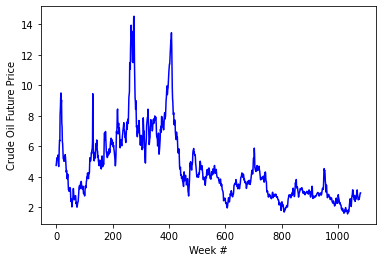

In [52]:
import csv
from matplotlib import pyplot as plt

file = open('natural_gas_futures_weekly_all.csv','r')
csv_handle = csv.DictReader(file)

weekly_prices = []
dates = []

for rows in csv_handle:
    dates.append(rows['Date'])
    weekly_prices.append(0.5 * (float(rows['High']) + float(rows['Low'])) )
file.close()

plt.plot(range(len(weekly_prices)), weekly_prices, '-b')
plt.xlabel('Week #')
plt.ylabel('Crude Oil Future Price')

In [70]:
from numpy.fft import fft, ifft
from numpy import real,imag

# here we have computed the fft of the weekly_prices
fft_data =  fft(weekly_prices)
N = len(fft_data)
assert(N == len(weekly_prices))
print(N/2)

540.5


Note that the rate at which the data is provided is 1 data item per week.
The data ranges over a period of 1082 weeks (~ 20 years). 

First we compute the fast fourier transform of the data using `numpy.fft.fft` function. Note that length of fft is also 1082.
Let the fft be stored in list `fft_data`.

Second, create a list called frequencies that has the frequency corresponding to each element in the `fft_data`. Remember that the data's time period is 1 week. We will represent all frequencies in the unit $\text{week}^{-1}$.

Using a combination of the `numpy.fft.fft` and `numpy.fft.ifft` functions, please extract the low frequency components of the signal that correspond to frequencies in the range `[0, 1/52 weeks]`, `[1/52 weeks, 1/13 weeks]` and the high frequency terms greater than or equal to  `1/13` weeks. 

The resulting lists should be called : `upto_1_year`, `one_year_to_1_quarter` and `less_than_1_quarter` respectively.

In [79]:
from numpy.fft import fft, ifft, fftfreq
from numpy import real,imag

# here we have computed the fft of the weekly_prices
fft_data =  fft(weekly_prices)
N = len(fft_data)
assert(N == len(weekly_prices))
# TODO: first fill in the frequencies call this list 
# fft_frequencies -- it must have length N
# it must store the frequencies of each element in the fft_data
# ensure that the frequencies of the second half are negative.
# your code here


fft_frequencies = fftfreq(len(fft_data),1)
# This function will be useful for you. Please go through the code.

def select_all_items_in_freq_range(lo, hi):
    # TODO: go through the fft_data and select only those frequencies in the range lo/hi
    new_fft_data = [] # make sure we have the 0 frequency component
    for (fft_val, fft_freq) in zip(fft_data, fft_frequencies):
        if lo <= fft_freq and fft_freq < hi:
            new_fft_data.append(fft_val)
        elif -hi < fft_freq and fft_freq <= -lo:
            new_fft_data.append(fft_val)
        else:
            new_fft_data.append(0.0)
    filtered_data = ifft(new_fft_data)
    assert all( abs(imag(x)) <= 1E-10 for x in filtered_data)
    return [real(x) for x in filtered_data]

upto_1_year = [] # All signal components with frequency < 1/52
one_year_to_1_quarter = [] # All signal components with frequency between 1/52 (inclusive) and 1/13 weeks (not inclusive)
less_than_1_quarter = [] # All signal components with frequency >= 1/13 

# TODO: Redefine the three lists using the select_all_items function
# your code here


All tests OK -- 10 points!!


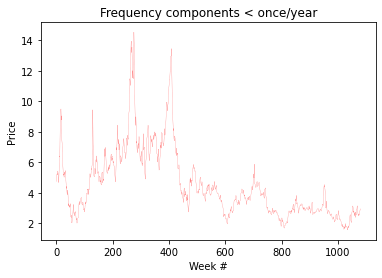

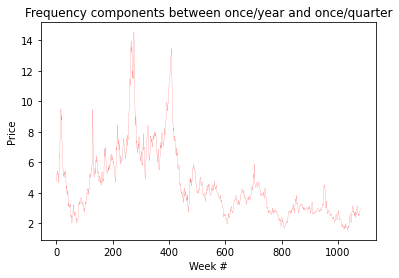

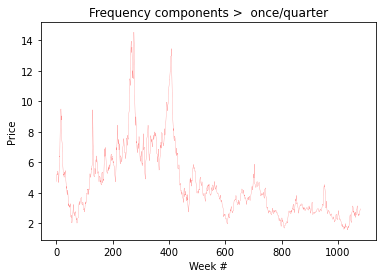

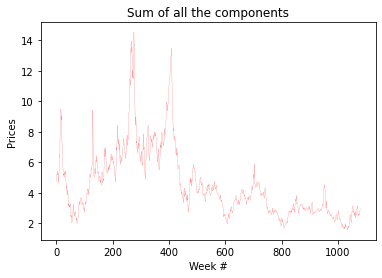

In [80]:
from matplotlib import pyplot as plt
plt.plot(upto_1_year,'-b',lw=2)
plt.plot(weekly_prices,'--r',lw=0.2)
plt.xlabel('Week #')
plt.ylabel('Price')
plt.title('Frequency components < once/year')
plt.figure()
plt.plot(one_year_to_1_quarter,'-b',lw=2)
plt.plot(weekly_prices,'--r',lw=0.2)
plt.title('Frequency components between once/year and once/quarter')
plt.xlabel('Week #')
plt.ylabel('Price')
plt.figure()
plt.plot(less_than_1_quarter,'-b',lw=2)
plt.plot(weekly_prices,'--r',lw=0.2)
plt.title('Frequency components >  once/quarter')
plt.xlabel('Week #')
plt.ylabel('Price')

plt.figure()
plt.plot([(v1 + v2 + v3) for (v1, v2, v3) in zip(upto_1_year,one_year_to_1_quarter,less_than_1_quarter)],'-b',lw=2)
plt.plot(weekly_prices,'--r',lw=0.2)
plt.title('Sum of all the components')
plt.xlabel('Week #')
plt.ylabel('Prices')

N = len(weekly_prices)
assert(len(fft_frequencies) == len(weekly_prices))
assert(fft_frequencies[0] == 0.0)
assert(abs(fft_frequencies[N//2] - 0.5 ) <= 0.05), f'fft frequncies incorrect: {fft_frequencies[N//2]} does not equal 0.5'
assert(abs(fft_frequencies[N//4] - 0.25 ) <= 0.05), f'fft frequncies incorrect:  {fft_frequencies[N//4]} does not equal 0.25'
assert(abs(fft_frequencies[3*N//4] + 0.25 ) <= 0.05), f'fft frequncies incorrect:  {fft_frequencies[3*N//4]} does not equal -0.25'
assert(abs(fft_frequencies[1] - 1/N ) <= 0.05), f'fft frequncies incorrect:  {fft_frequencies[1]} does not equal {1/N}'
assert(abs(fft_frequencies[N-1] + 1/N ) <= 0.05), f'fft frequncies incorrect:  {fft_frequencies[N-1]} does not equal {-1/N}'

for (v1, v2, v3, v4) in zip(weekly_prices, upto_1_year,one_year_to_1_quarter,less_than_1_quarter ):
    assert ( abs(v1 - (v2 + v3+v4)) <= 0.01), 'The components are not adding up -- there is a mistake in the way you split your original signal into various components'
print('All tests OK -- 10 points!!')

# That's all Folks!